In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.style.use('ggplot')
plt.rc('figure',figsize=(15,12))     #调整默认的size
import warnings
warnings.filterwarnings("ignore")

In [2]:
#读取北京的数据
beijing1 = pd.read_table('C:/ziru_spider/data/beijing1.txt',sep=',',index_col=None,header=None,
                         names=['title','area','floor','floors','chamber','nearby','district','location','price'])
beijing2 = pd.read_table('C:/ziru_spider/data/beijing2.txt',sep=',',index_col=None,header=None,
                         names=['title','area','floor','floors','chamber','nearby','district','location','price'])
beijing3 = pd.read_table('C:/ziru_spider/data/beijing3.txt',sep=',',index_col=None,header=None,
                         names=['title','area','floor','floors','chamber','nearby','district','location','price'])
beijing4 = pd.read_table('C:/ziru_spider/data/beijing4.txt',sep=',',index_col=None,header=None,
                         names=['title','area','floor','floors','chamber','nearby','district','location','price'])
huilongguan = pd.read_table('C:/ziru_spider/data/huilongguan.txt',sep=',',index_col=None,header=None,
                         names=['title','area','floor','floors','chamber','nearby','district','location','price'])
wangjing = pd.read_table('C:/ziru_spider/data/wangjing.txt',sep=',',index_col=None,header=None,
                         names=['title','area','floor','floors','chamber','nearby','district','location','price'])
tiantongyuan = pd.read_table('C:/ziru_spider/data/tiantongyuan.txt',sep=',',index_col=None,header=None,
                         names=['title','area','floor','floors','chamber','nearby','district','location','price'])
beijing = pd.concat([beijing1,beijing2,beijing3,beijing4,huilongguan,wangjing,tiantongyuan],ignore_index=True)
beijing_unique = beijing.drop_duplicates()
beijing_unique['city'] = '北京'
#读取上海的数据
shanghai = pd.read_table('C:/ziru_spider/data/shanghai.txt',sep=',',index_col=None,header=None,
                         names=['title','area','floor','floors','chamber','nearby','district','location','price'])
shanghai_unique = shanghai.drop_duplicates()
shanghai_unique['city'] = '上海'
#读取深圳的数据
shenzhen = pd.read_table('C:/ziru_spider/data/shenzhen.txt',sep=',',index_col=None,header=None,
                         names=['title','area','floor','floors','chamber','nearby','district','location','price'])
shenzhen_unique = shenzhen.drop_duplicates()
shenzhen_unique['city'] = '深圳'
#读取广州的数据
guangzhou = pd.read_csv('C:/ziru_spider/data/gz_ziru.csv',index_col=False)
guangzhou_unique = guangzhou.drop_duplicates()
guangzhou_unique['city'] = '广州'

经过读取删除重复数据后，北京原始数据38832，去重后剩下28780条，广州原始数据5767条，去重后剩下4666条，上海原始数据10896条，去重后剩下10688条，深圳原始数据17836条，去重后剩下9126条。
北京和上海都有较多的重复信息

In [3]:
#合并各城市的数据
data = pd.concat([beijing_unique,shanghai_unique,shenzhen_unique,guangzhou_unique],ignore_index=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53260 entries, 0 to 53259
Data columns (total 10 columns):
title       53260 non-null object
area        53260 non-null object
floor       53260 non-null object
floors      53254 non-null float64
chamber     53260 non-null object
nearby      50454 non-null object
district    53260 non-null object
location    53260 non-null object
price       53260 non-null int64
city        53260 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 4.1+ MB


In [7]:
data.head()

,title,area,floor,floors,chamber,nearby,district,location,price,city
0,安外东河沿2居室-南,60㎡,6,12.0,2室1厅,距5号线雍和宫站步行约497米,东城,安定门,8960,北京
1,安德路47号院2居室-西卧,6.4㎡,2,6.0,2室1厅,距2号线安定门站步行约908米,东城,安定门,2830,北京
2,青年湖西里4居室-南卧,8.7㎡,5,5.0,4室1厅,距8号线安德里北街站步行约720米,东城,安定门,3060,北京
3,青年湖北里2居室-北卧,8.1㎡,4,5.0,2室1厅,距5号线和平里北街站步行约1326米,东城,安定门,3230,北京
4,青年湖西里2居室-南卧,14.3㎡,5,5.0,2室1厅,距8号线安德里北街站步行约720米,东城,安定门,4460,北京


In [4]:
#下面开始数据清洗
#对area列进行处理，将面积单位去掉，有些数据前面还有个约字，用strip去掉，删掉面积在5以下的异常数据
data.loc[:,'area'] = data.area.str.replace('㎡','').str.strip('约')
data.area = data.loc[:,'area'].astype('float')    #将面积转为浮点数
data = data.loc[(data.area>=5)]

In [55]:
data.area.head()

0    60.0
1     6.4
2     8.7
3     8.1
4    14.3
Name: area, dtype: float64

In [5]:
#用0填充附近地铁距离列nearby的缺失值
data.nearby.fillna('0',inplace=True)

In [6]:
#新建subway_meter列，用表示距离最近地铁的距离，单位是米，0表示无数据
data['subway_meters'] = 0
#对附近地铁距离进行切割，将得到的距离赋给新建的列
data.loc[(data.nearby!='0'),'subway_meters'] = data.nearby[data.nearby!='0'].str.split('约').apply(lambda x:x[1]).str.strip('米')
#将地铁距离转为int类型，因为有部分距离不是数值，将其转为缺失值再行处理
data.subway_meters = pd.to_numeric(data.subway_meters,errors='coerce')
data.loc[data.subway_meters.isnull(),'subway_meters'] = data[data.subway_meters.isnull()].nearby.str.split('约').apply(lambda x:x[2]).str.strip('米')
#将地铁距离列转为整数
data.subway_meters = data.subway_meters.astype('int')

In [48]:
data.subway_meters.head()

0     497
1     908
2     720
3    1326
4     720
Name: subway_meters, dtype: int32

In [7]:
#再建立一列，用于描述租房地点距离地铁的远近，0-700米以内为近，700-1500米为中，1500米以上为远
#附近地铁无数据的直接归到远分类中
#将距离地铁700m以内的非0数据归为近，700-1200的归为中等，1200以上归为远，将数值为0的归为远
data.loc[data.subway_meters==0,'subway_meters'] = 2000      #将距离为0的改为2000，以便归类到远离地铁的分类
data['subway_distance'] = pd.cut(data.subway_meters,[0,700,1500,6000])

In [49]:
data.subway_distance.head()

0       (0, 700]
1    (700, 1500]
2    (700, 1500]
3    (700, 1500]
4    (700, 1500]
Name: subway_distance, dtype: category
Categories (3, interval[int64]): [(0, 700] < (700, 1500] < (1500, 6000]]

In [8]:
#新建subway列，表示地铁站，缺失的用''表示
data['subway'] = ''
data.loc[(data.nearby!='0'),'subway'] = data.nearby[data.nearby!='0'].str.split('步').apply(lambda x:x[0]).str.split('线').apply(lambda x:x[1])

In [50]:
data.subway.head()

0      雍和宫站
1      安定门站
2    安德里北街站
3    和平里北街站
4    安德里北街站
Name: subway, dtype: object

In [9]:
#新建subway_line列，表示地铁线，缺失的用''表示
data['subway_line'] = ''
data.loc[(data.nearby!='0'),'subway_line'] = data.nearby[data.nearby!='0'].str.split('步').apply(lambda x:x[0]).str.split('线').apply(lambda x:x[0]).str.strip('距离').apply(lambda x:x+'线')

In [51]:
data.subway_line.head()

0    5号线
1    2号线
2    8号线
3    5号线
4    8号线
Name: subway_line, dtype: object

In [10]:
#新建room和hall表示房间数量和客厅数量
data['room'] = data.chamber.apply(lambda x:x[0])
data['hall'] = data.chamber.apply(lambda x:x[2])
#将这两个数据改为int类型
data.loc[:,['room','hall']] = data.loc[:,['room','hall']].astype('int')

In [52]:
data.loc[:,['room','hall']].head()

,room,hall
0,2,1
1,2,1
2,4,1
3,2,1
4,2,1


In [11]:
#对标题进行处理，提取出出租屋的朝向
data['orient'] = data.title.str.split('-').apply(lambda x:x[1])
data.loc[:,'orient'] = data.orient.str.strip('卧')
#将房屋朝向有问题的数据修正
data.orient.value_counts()
orient_fix = data[~(data.orient.isin(['南','北','东','西','南北','东南','西南','西北','东北','东西']))]
orient_fix.loc[:,'orient'] = orient_fix.title.str.split('-').apply(lambda x:x[2]).str.strip('卧')
data.loc[~(data.orient.isin(['南','北','东','西','南北','东南','西南','西北','东北','东西'])),'orient'] = orient_fix.loc[:,'orient']

In [56]:
data.orient.head()

0    南
1    西
2    南
3    北
4    南
Name: orient, dtype: object

In [12]:
#通过观察发现所在楼层列floor中包含若干非数值型数据，如14楼这里显示的是13A
#统一处理楼层中包含A的数据
data.loc[(data.floor.str.contains('A',na=False)),'floor'] = data[data.floor.str.contains('A',na=False)].floor.str.strip('A').apply(lambda x:str(int(x)+1))
#还有几个非数值型数据，使用pandas的to_numeric方法将其转为nan，然后删掉
data.floor = pd.to_numeric(data.floor,errors='coerce')
#将缺失floor删掉，并将floor列转为int类型
data = data.dropna()
data.floor = data.floor.astype('int')
#清除floor列中值为0的数据
data = data.loc[data.floor!=0]

In [57]:
data.floor.head()

0    6
1    2
2    5
3    4
4    5
Name: floor, dtype: int32

In [13]:
#floors列中有几个缺失值和值为0的数据，对其进行删除处理
data = data.dropna()
data.floors = data.floors.astype('int')
data = data[data.floors!=0]    #去掉floors中值为0的数据

In [58]:
data.floors.head()

0    12
1     6
2     5
3     5
4     5
Name: floors, dtype: int32

In [14]:
#新建一列，计算出每平米租金
data['rmb_per_sqm'] = data.price/data.area

In [60]:
data.rmb_per_sqm.head()

0    149.333333
1    442.187500
2    351.724138
3    398.765432
4    311.888112
Name: rmb_per_sqm, dtype: float64

In [49]:
data.head(2)

,title,area,floor,floors,chamber,nearby,district,location,price,city,subway_meters,subway_distance,subway,subway_line,room,hall,orient,rmb_per_sqm
0,安外东河沿2居室-南,60.0,6,12,2室1厅,距5号线雍和宫站步行约497米,东城,安定门,8960,北京,497,"(0, 700]",雍和宫站,5号线,2,1,南,149.333333
1,安德路47号院2居室-西卧,6.4,2,6,2室1厅,距2号线安定门站步行约908米,东城,安定门,2830,北京,908,"(700, 1500]",安定门站,2号线,2,1,西,442.187500


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53146 entries, 0 to 53259
Data columns (total 18 columns):
title              53146 non-null object
area               53146 non-null float64
floor              53146 non-null int32
floors             53146 non-null int32
chamber            53146 non-null object
nearby             53146 non-null object
district           53146 non-null object
location           53146 non-null object
price              53146 non-null int64
city               53146 non-null object
subway_meters      53146 non-null int32
subway_distance    53146 non-null category
subway             53146 non-null object
subway_line        53146 non-null object
room               53146 non-null int32
hall               53146 non-null int32
orient             53146 non-null object
rmb_per_sqm        53146 non-null float64
dtypes: category(1), float64(2), int32(5), int64(1), object(9)
memory usage: 6.3+ MB


至此，数据的预处理就结束了，下面简单对广州的租房信息进行分析，主要分析了以下几点
整体的房租价格分布
不同户型公寓占比情况
出租面积分布和均值
每平米租金分布和均值，各行政区的每平米租金均值
地铁距离和租金，最贵和最便宜的地铁站，不同线路的租金均值
各行政区的房源数量，各地铁站的房源数量，不同地铁距离的房源数量，各线路房源数量
出租屋朝向数量分布

In [15]:
#获取广州的信息
gz = data[data.city=='广州']

1703.2661808829832


(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 <a list of 9 Text yticklabel objects>)

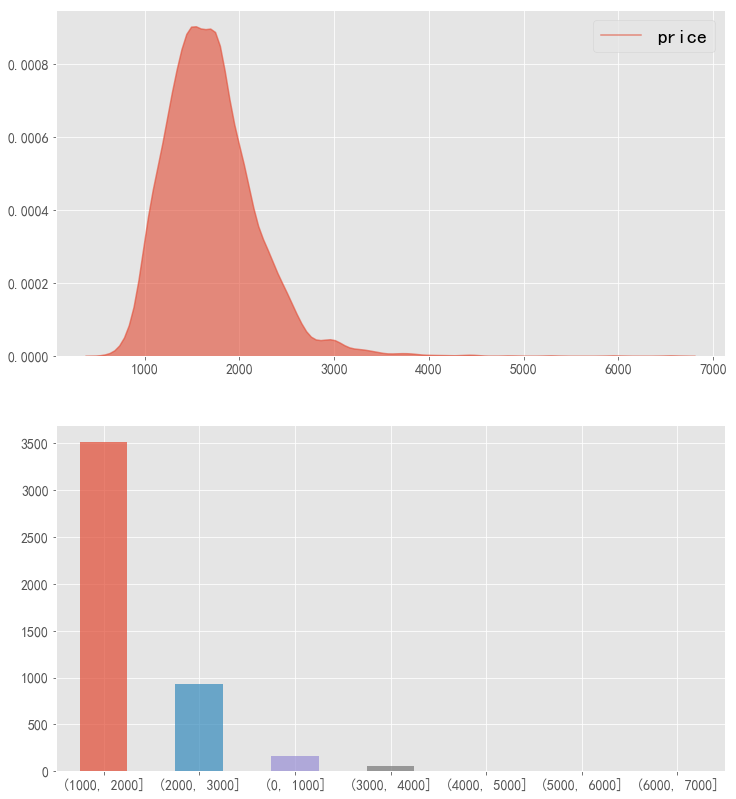

In [47]:
#首先我们来看看房租的价格分布
print(gz.price.mean())     #房租的均值在一千七附近

#大部分价格分布在1000-2700这个范围
fig = plt.figure(figsize=(12,14))
ax1 = fig.add_subplot(2,1,1)
sns.kdeplot(gz.price,shade=True,alpha=0.6)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(prop={'size':20})

ax2 = fig.add_subplot(2,1,2)
pd.cut(gz.price,range(0,7001,1000)).value_counts().plot.bar(alpha=0.7)     #约75%的价格分布在1000-2000
plt.xticks(rotation=360,size=14)
plt.yticks(size=14)

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 <a list of 6 Text yticklabel objects>)

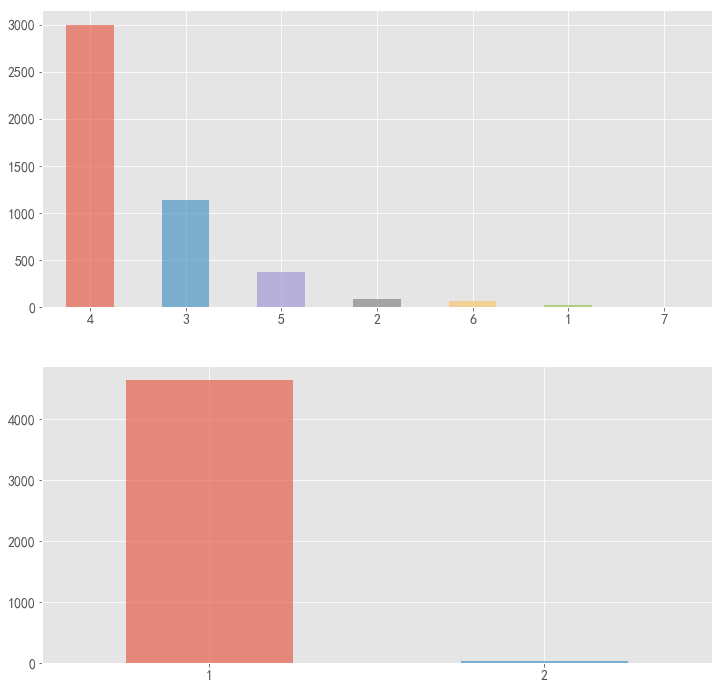

In [117]:
#分析不同户型的占比情况
#4房最多，2999套，3房其次，有1134套，然后是5房的，有373套
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,1,1)
gz.room.value_counts().plot.bar(alpha=0.6)
plt.xticks(rotation=360,size=14)
plt.yticks(size=14)

#几乎都是一厅的，有4639套，2厅的只有27套
ax3 = fig.add_subplot(2,1,2)
gz.hall.value_counts().plot.bar(alpha=0.6)
plt.xticks(rotation=360,size=14)
plt.yticks(size=14)

10.465675096442281


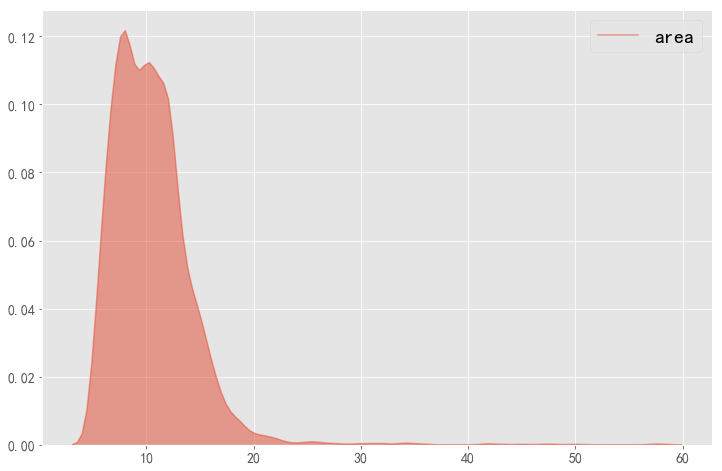

In [113]:
#分析面积
print(gz.area.mean())       #人均面积为10.46，还是挺小的，说明合租为多

#分析出租面积的分布，大部分分布在5-19之间
fig = plt.figure(figsize=(12,8))
sns.kdeplot(gz.area,shade=True,alpha=0.5)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(prop={'size':20})

广州每平米租金均值：172.2410681150198


(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text yticklabel objects>)

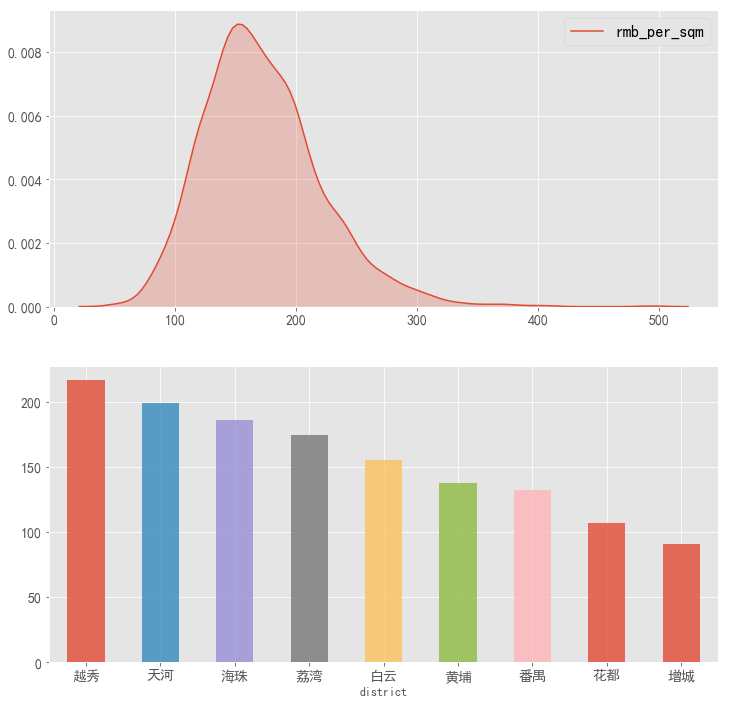

In [140]:
#分析每平方米租金情况
#广州全市的平均租金，分布情况接近正态分布，均值是172.24
fig = plt.figure(figsize=(12,12))
ax1 = fig.add_subplot(2,1,1)
sns.kdeplot(gz['rmb_per_sqm'],shade=True)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(prop={'size':16})
print('广州每平米租金均值：' + str(gz.rmb_per_sqm.mean()))

#对行政区进行分组分析
#越秀，天河，海珠这些中心地带的每平米租金稳居前三，最便宜的前三是番禺花都增城，都是远离市中心的地方
ax2 = fig.add_subplot(2,1,2)
gz.groupby('district').rmb_per_sqm.mean().sort_values(ascending=False).plot.bar(alpha=0.8)
plt.xticks(rotation=360,size=14)
plt.yticks(size=14)

Text(0.5,0,'地铁站')

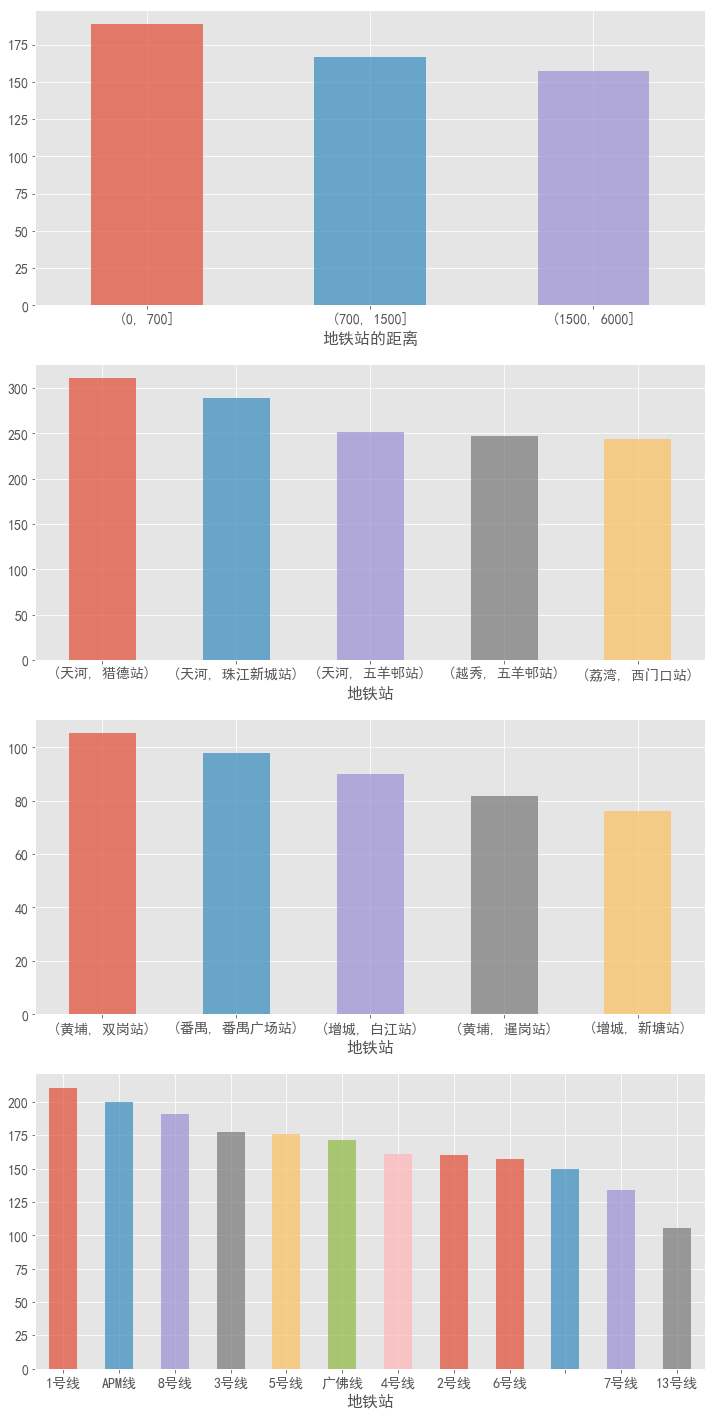

In [20]:
#再来看看地铁距离和房价的关系
#果然不出所料，距离越近越贵，符合规律
fig = plt.figure(figsize=(12,25))
ax1 = fig.add_subplot(4,1,1)
gz.groupby('subway_distance').rmb_per_sqm.mean().plot.bar(alpha=0.7)
plt.xticks(rotation=360,size=14)
plt.yticks(size=14)
plt.xlabel('地铁站的距离',size=16)

#根据地铁站分组分析租金，最贵的前五名中四个是五号线珠江新城附近，而且是连在一起的四个站，珠江新城，恐怖如斯
ax2 = fig.add_subplot(4,1,2)
gz.groupby(['district','subway']).rmb_per_sqm.mean().sort_values(ascending=False).head().plot.bar(alpha=0.7)
plt.xticks(rotation=360,size=14)
plt.yticks(size=14)
plt.xlabel('地铁站',size=16)

#最便宜的五个地铁站分布在黄埔番禺增城这些较偏的地方
ax3 = fig.add_subplot(4,1,3)
gz.groupby(['district','subway']).rmb_per_sqm.mean().sort_values(ascending=False)[-5:].plot.bar(alpha=0.7)
plt.xticks(rotation=360,size=14)
plt.yticks(size=14)
plt.xlabel('地铁站',size=16)

#分析各地铁线路的每平米租金排名
#前五名分别是：一号线，APM线，8号线，3号线和5号线
#租金突破2000大关的1号线，途径天河区、越秀区和荔湾区几个市中心；APM线由于贯穿珠江新城核心区域，途径天河和海珠，沿途租金自然贵。
#租金相对最便宜的13号线，因为2017年年末才开通运营，线路新，全程11个站，途径增城区和黄埔区，位置比较偏僻
ax3 = fig.add_subplot(4,1,4)
gz.groupby(['subway_line']).rmb_per_sqm.mean().sort_values(ascending=False).plot.bar(alpha=0.7)
plt.xticks(rotation=360,size=14)
plt.yticks(size=14)
plt.xlabel('地铁站',size=16)


Text(0.5,0,'地铁线路')

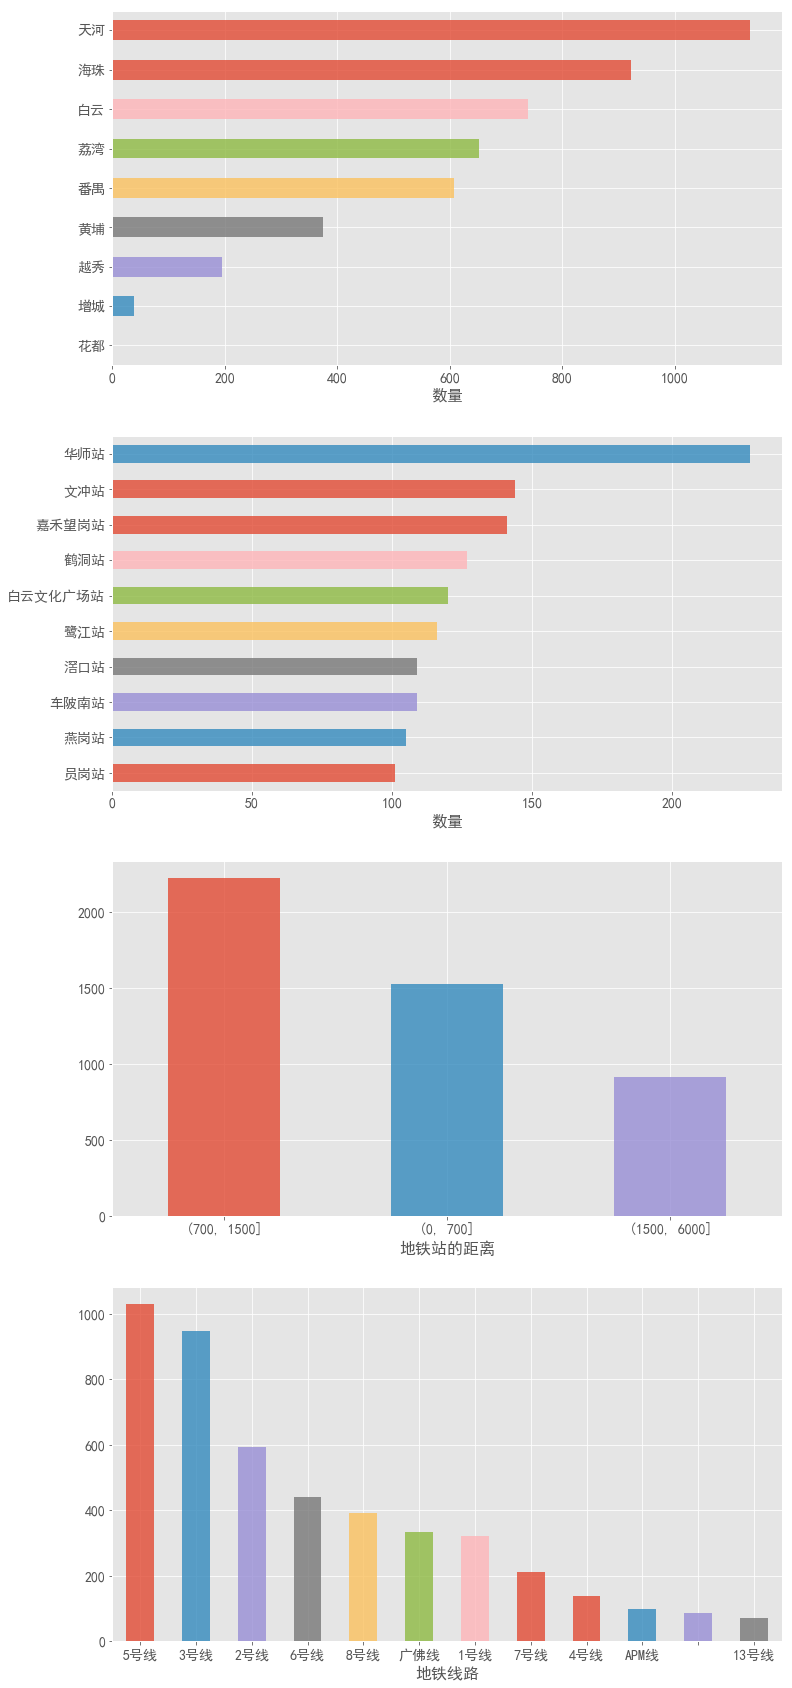

In [30]:
#观察广州房源数量的情况，天河海珠白云位列前三
#广州一共9个区，自如租房约87%的房源集中在天河，海珠，白云，荔湾，番禺这五个区
fig = plt.figure(figsize=(12,30))
ax1 = fig.add_subplot(4,1,1)
gz.groupby('district').size().sort_values().plot.barh(alpha=0.8)
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylabel('')
plt.xlabel('数量',size=16)

#看看房源最多的是哪些地铁站附近
#可以看到，房源最多的是华师站，大约两百七十套，远超其他地铁站
ax2 = fig.add_subplot(4,1,2)
gz.groupby(['subway']).size().sort_values(ascending=False).head(10).sort_values().plot.barh(alpha=0.8)
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylabel('')
plt.xlabel('数量',size=16)

#分析不同地铁距离的房源数量
#距离地铁站距离700-1500米的最多，超过两千套，其次是0-700米，1500套左右，最后是1500米以上的，不到一千套
ax3 = fig.add_subplot(4,1,3)
gz.groupby(['subway_distance']).size().sort_values(ascending=False).plot.bar(alpha=0.8)
plt.xticks(rotation=360,size=14)
plt.yticks(size=14)
plt.xlabel('地铁站的距离',size=16)

#分析地铁线的房源数量分布
#5号线和3号线这两条经过珠江新城的线路房子最多，都在一千套附近
ax3 = fig.add_subplot(4,1,4)
gz.groupby('subway_line').size().sort_values(ascending=False).plot.bar(alpha=0.8)
plt.xticks(rotation=360,size=14)
plt.yticks(size=14)
plt.xlabel('地铁线路',size=16)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text yticklabel objects>)

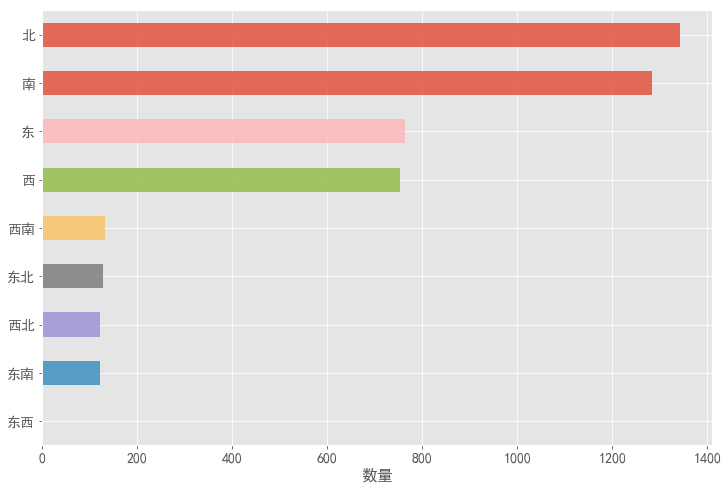

In [164]:
#合租出租屋朝向数据分析
#南北向的最多，数量都在一千三附近，东西向的数量也相近，在七百七十附近
#因为南北朝向房子冬暖夏凉，光线充足，有利于房间采光。所以朝南的房间最多，北向房间次之。
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,1,1)
gz[gz.area<30].groupby('orient').size().sort_values().plot.barh(alpha=0.8)
plt.ylabel('')
plt.xlabel('数量',size=16)
plt.xticks(size=14)
plt.yticks(size=14)

广州地区租房分析总结

通过以上分析，我们得知自如租房广州的平均租房金额是1700左右，租房人均面积10平米左右，即每平方米租金约170

天河，海珠和越秀这些市区的房租较高，每平米租金在两百左右

房源数量上天河，海珠，白云，荔湾和番禺这五个区就囊括了广州87%的房源

最贵的地方在珠江新城一带，每平米均价应该在两百七十左右，但交通便利，设施完善

最便宜的在增城花都黄埔等偏远地区，每平均价不到一百，只是上班的话路上会花很多时间

距离地铁的距离也是一大影响因素，越近房租越高，近地铁的公寓比不近地铁的公寓平均租金高出220元以上

出租房屋大部分都是3-5室，1厅的房子，卧室的大小分布在5-19平米附近，价格分布在1000-2700之间

因为自如上都是合租，这里的居住面积应该是卧室的面积，实际使用面积应该会更大，不过卧室10平米要1700感觉还是有点小贵，和朋友到城中村附近找一找，完全能找到便宜舒适的房子，比如我现在住的地方是城中村旁的集资自建房，三个人住人均只要一千就能搞定

当然，如果你收入较高，对品质有追求的话，没有耐心自己找房，通过自如平台更方便快捷找到心仪的住所，多付点钱也是无可厚非的，这个就见仁见智了。

既然已经抓取了北上广深四个城市的数据，那顺便再看看各个城市间的区别好了

下面分析一下不同城市的房源数量，每平米租金和平均租房面积等数据

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.]),
 <a list of 8 Text yticklabel objects>)

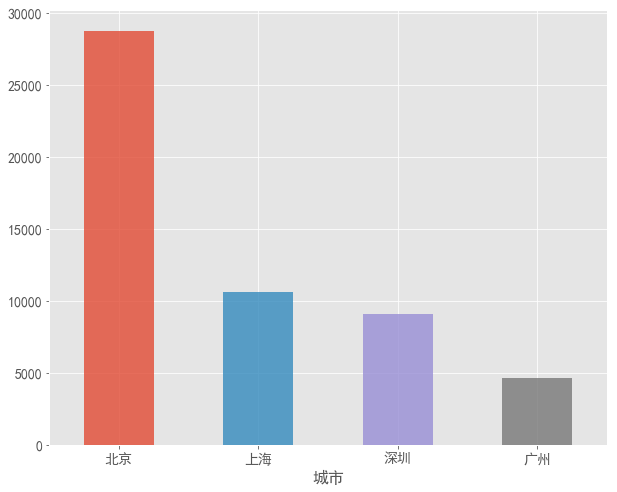

In [178]:
fig = plt.figure(figsize=(10,8))
data.groupby('city').size().sort_values(ascending=False).plot.bar(alpha=0.8)
plt.xlabel('城市',size=16)
plt.xticks(size=14,rotation=360)
plt.yticks(size=14)
#可以看到，北京房源数量遥遥领先其他城市，将近三万套，上海和深圳在一万套左右，广州最少，只有不到五千
#理论上同为一线城市，广州的房源数量应该不至于这么少，猜测是自如在各城市的市场份额不同的原因

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text yticklabel objects>)

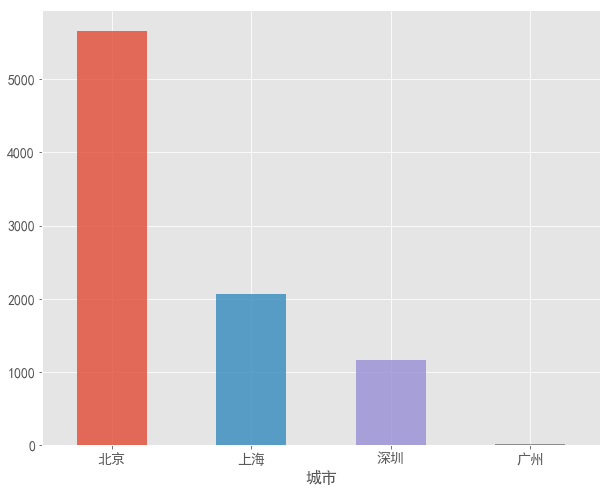

In [179]:
#此外，据观察，除广州外，其他城市的整租公寓较多，直接比较公寓租金均值和人均租用面积会导致广州的数据偏低
#此处计算时采用的公寓采用30平米以下的合租公寓进行分析，因为一般合租的单间面积不会超过30平米
fig = plt.figure(figsize=(10,8))
data[data.area>30].groupby('city').size().sort_values(ascending=False).plot.bar(alpha=0.8)
plt.xlabel('城市',size=16)
plt.xticks(size=14,rotation=360)
plt.yticks(size=14)
#筛选面积大于30的公寓，可以发现，广州几乎没有这方面的房源

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text yticklabel objects>)

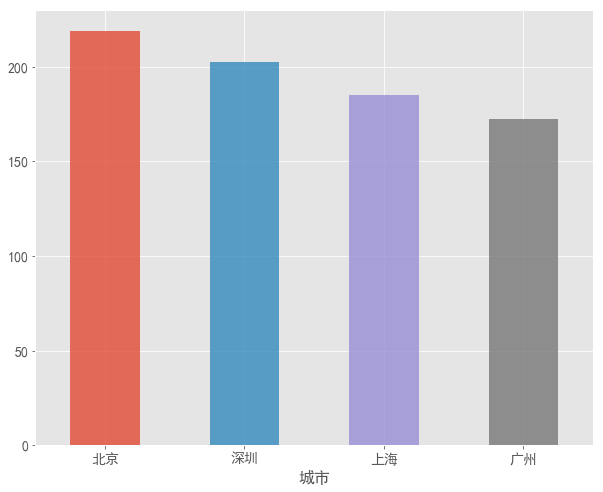

In [184]:
#各城市合租的每平米均价排行
#北京以218.8元/平米高居第一，深圳以202.5元/平米位居第二，上海184.9元/平米，广州172.6元/平米
#还是广州的居住最友好啊
fig = plt.figure(figsize=(10,8))
data[data.area<30].groupby('city').rmb_per_sqm.mean().sort_values(ascending=False).plot.bar(alpha=0.8)
plt.xlabel('城市',size=16)
plt.xticks(size=14,rotation=360)
plt.yticks(size=14)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text yticklabel objects>)

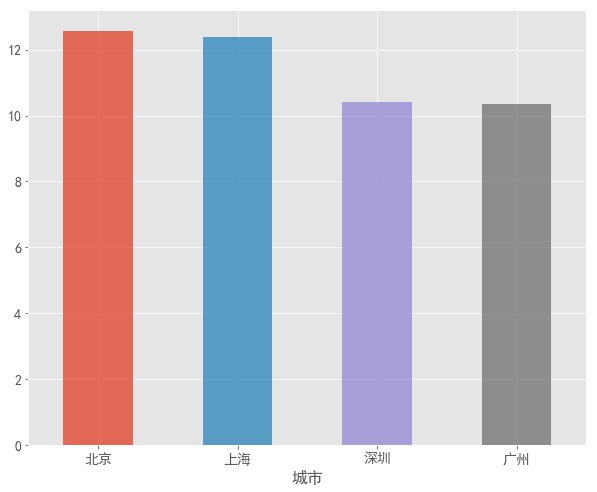

In [185]:
#各城市合租的平均面积
#北京上海在12平米左右，深圳广州在10平米左右
fig = plt.figure(figsize=(10,8))
data[data.area<30].groupby('city').area.mean().sort_values(ascending=False).plot.bar(alpha=0.8)
plt.xlabel('城市',size=16)
plt.xticks(size=14,rotation=360)
plt.yticks(size=14)

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 <a list of 7 Text yticklabel objects>)

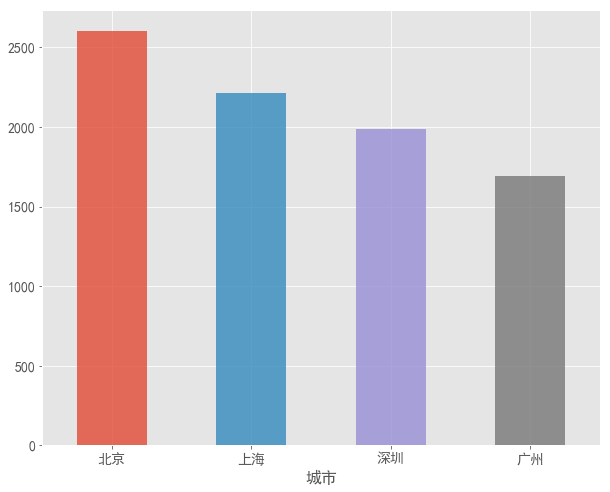

In [186]:
#各城市合租的平均租金
fig = plt.figure(figsize=(10,8))
data[data.area<30].groupby('city').price.mean().sort_values(ascending=False).plot.bar(alpha=0.8)
plt.xlabel('城市',size=16)
plt.xticks(size=14,rotation=360)
plt.yticks(size=14)

经过一番分析发现，自如平台上广州的合租租房价格是最低的，广州在四座一线城市中，每平米租金最低，租房环境相对友好，同样的价格，在广州能租到面积更大，体验感更好的房子